## Visualization of filters

In this notebook, we want to visualize the trained filters of the model

In [1]:
%matplotlib inline
import sys
if ".." not in sys.path:
    sys.path.append("..")
    
from keras.models import load_model
import mne

filename = "/home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_10229001.set"
data_mne = mne.io.read_raw_eeglab(filename, preload=True, event_id={"0": 1, "1": 2})

channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

model = load_model("models/model_cnn_1.h5")



/home/jmperez/.pyenv/versions/3.6.5/envs/p300/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Reading /home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_10229001.fdt
Reading 0 ... 63231  =      0.000 ...   493.992 secs...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [2]:
weights, biases = model.layers[0].get_weights()

weights.shape

(14, 1, 1, 12)

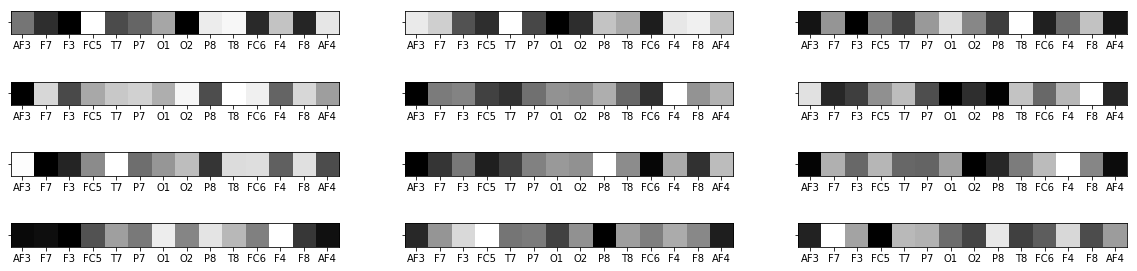

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 5)

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(weights[..., i].reshape(1, 14), cmap=plt.cm.gray_r)
    plt.xticks(range(14), channels)
    plt.yticks(range(1), [''])
    

plt.savefig("channel_filters.png")

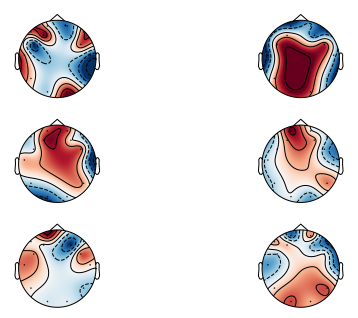

In [4]:
import mne
from p300.preprocessing import load_data_from_subject


plt.rcParams['figure.figsize'] = (8, 5)

for i in range(6):
    spatial_filter = weights[..., i].reshape(14)
    ax = plt.subplot(3,2,i+1)
    mne.viz.plot_topomap(spatial_filter, data_mne.info, axes=ax, show=False)

plt.savefig("topo_filters.png")
    